## Machine Learning for Sustainable Development Goal 13: Climate Change


##  Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
data = pd.read_csv('DailyDelhiClimate.csv')

## Display the first few rows of the dataset


In [ ]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


# Data Preprocessing

# Check data types and missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1576 non-null   object 
 1   meantemp      1576 non-null   float64
 2   humidity      1576 non-null   float64
 3   wind_speed    1576 non-null   float64
 4   meanpressure  1576 non-null   float64
dtypes: float64(4), object(1)
memory usage: 61.7+ KB


# Convert 'date' column to datetime

In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Check for missing values

In [ ]:
data.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


# Handle missing values by filling with mean or dropping (if necessary)

In [ ]:
data.fillna(data.mean(), inplace=True)

#Exploratory Data Analysis (EDA)

# Summary statistics

In [ ]:
data.describe()

,date,meantemp,humidity,wind_speed,meanpressure
count,1576,1576.000000,1576.000000,1576.000000,1576.000000
mean,2015-02-27 10:15:50.253807104,25.221918,60.445229,6.899262,1010.593178
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-29 18:00:00,18.500000,49.750000,3.700000,1001.875000
50%,2015-02-27 12:00:00,27.166667,62.440476,6.363571,1009.055556
75%,2016-03-27 06:00:00,31.142857,72.125000,9.262500,1015.200000
max,2017-04-24 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.345014,16.979994,4.510725,175.242704


# Correlation matrix

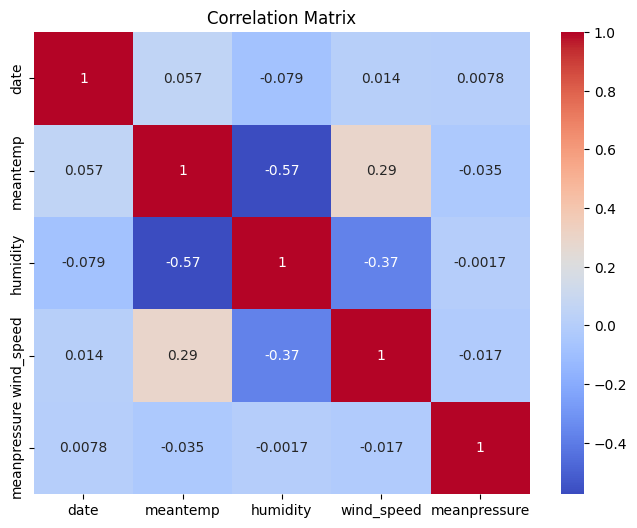

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Distribution of each feature

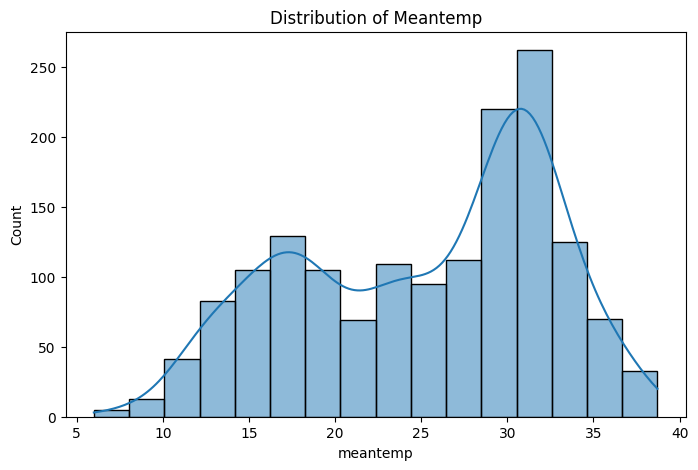

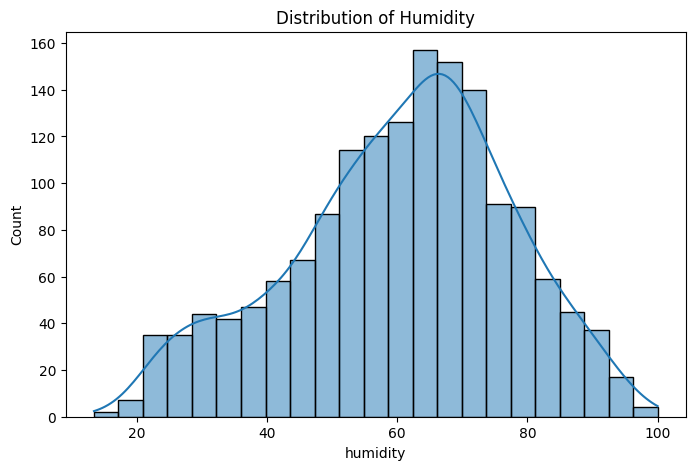

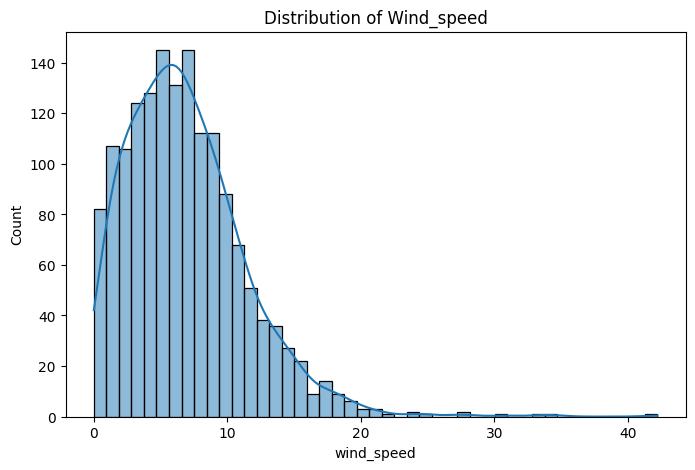

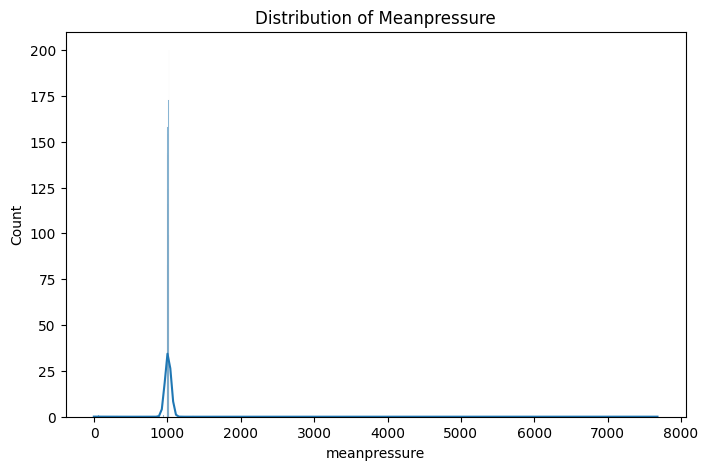

In [ ]:
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.show()



# Time series plot for each feature

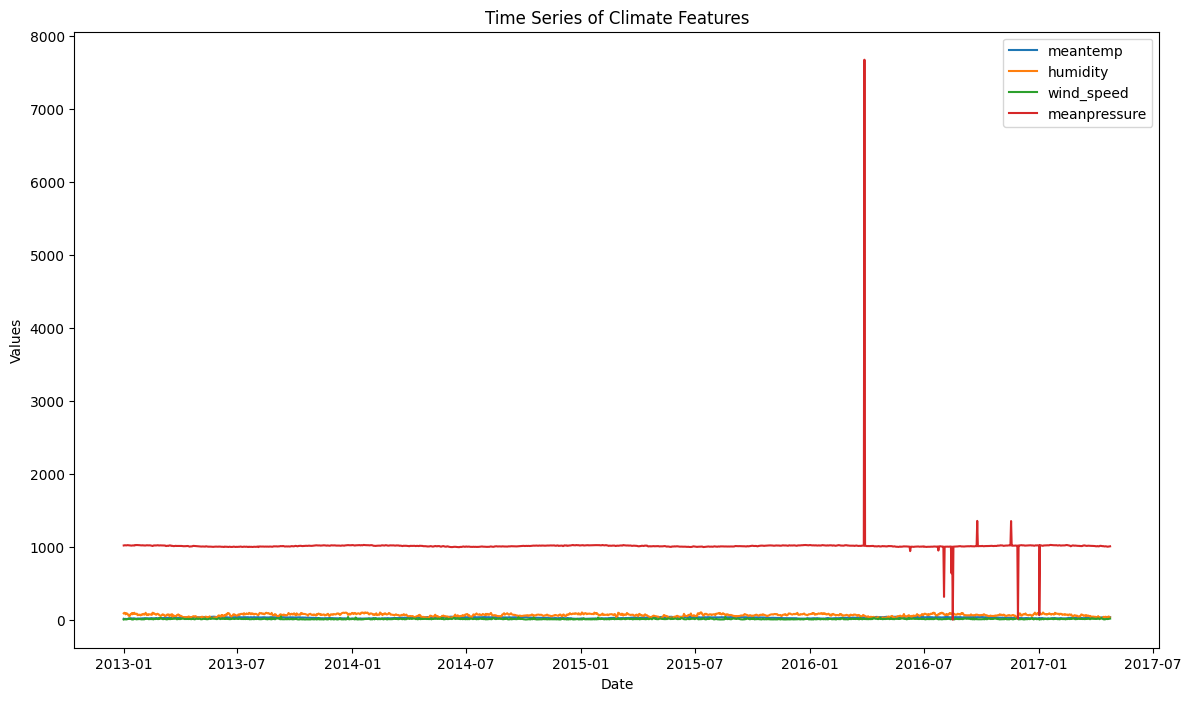

In [ ]:
plt.figure(figsize=(14, 8))
for feature in features:
    plt.plot(data['date'], data[feature], label=feature)
plt.legend()
plt.title('Time Series of Climate Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Data Preparation for Modeling

In [ ]:
# Set target variable and features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_scoreX = data[['humidity', 'wind_speed', 'meanpressure']]
y = data['meantemp']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model Selection and Model Implementation

#Random Forest

In [ ]:
# Initialize and fit Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R2 Score:", r2_rf)


Random Forest Mean Squared Error: 6.44575376466829
Random Forest R2 Score: 0.8838157790858578


# Results and Evaluation

In [ ]:
# Feature importance for Random Forest model
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.2f}')




humidity: 0.11
wind_speed: 0.04
meanpressure: 0.85


# Visualizations and Insights

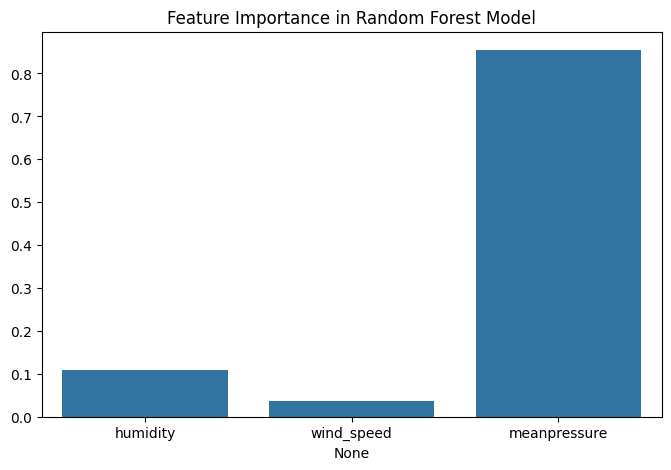

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=X.columns, y=feature_importances)
plt.title('Feature Importance in Random Forest Model')
plt.show()

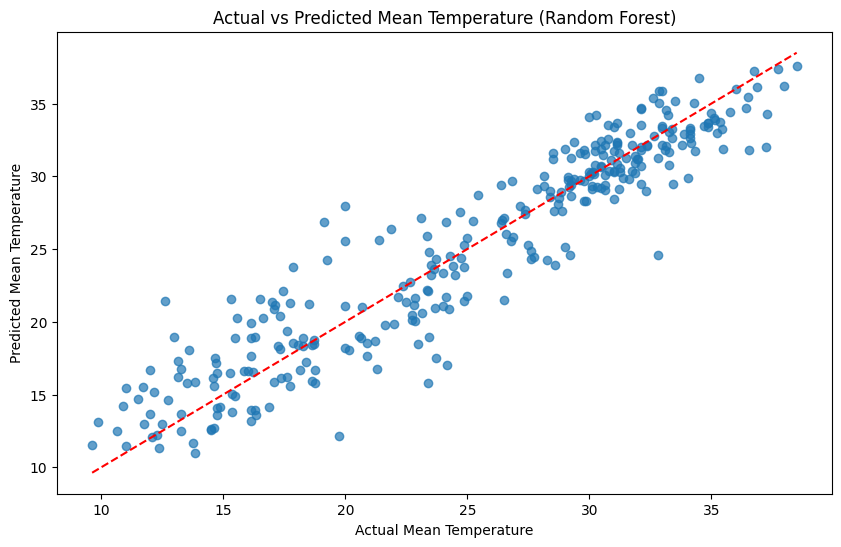

In [ ]:
# Prediction vs. Actual for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Mean Temperature')
plt.ylabel('Predicted Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature (Random Forest)')
plt.show()


#Filters for Interactive Analysis

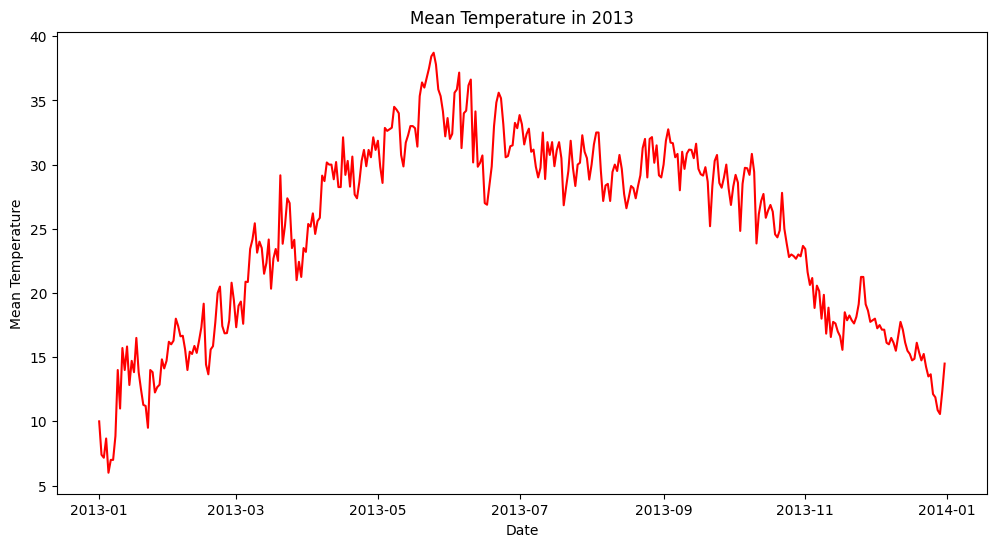

In [ ]:
# Example: Filter data for a specific year (e.g., 2013)
year_data = data[data['date'].dt.year == 2013]

# Plot yearly data for mean temperature
plt.figure(figsize=(12, 6))
plt.plot(year_data['date'], year_data['meantemp'], label='Mean Temperature', color='red')
plt.title('Mean Temperature in 2013')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()
